$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $ $ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $ 
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{pi}{4}}} } $ 
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $ 
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{pi}{4}}} } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

# Summary,Our New Work,Outcomes,Challenges,Suggestion

## Summary: ##
In this section we explain a summary of the quantum walk and it's benefits in comparison with random classical walk as the main title of this project in which we have focused on. Also, the random classical walk is simulated to be compared with the quantum walk. 
We will create a comprehensive library, named class quantom_walk, that includes all projects functions. The unitary matrix is obtained to be used in Matlab in order to find the U-gate's  with optimized angles. We use the results of optimiziation and compare it with the circuit that the coins qubit is initialized only by a simple Hadamard operator and show that we have a better probability distribution which is our new work.
The instruction set  in qasm extracted and is used to impelement our circuit on IBM composer.
Finally our program  codes will be performed on  IBM real computer.
We also  discussed the project's challenges, our solutions, and some open questions that can be studied in the future.


## Review: ##
The figure below shows that the probability distribution over the existing positions will be much better when using quantum walk instead of classical walk. The probability is not accumulated only on a specific range of positions, such as the Gaussian distribution.
For example, suppose we are looking for a target among existing positions. Suppose any of the positions have a significant probability after several steps. In that case, the target position is more probable to be touched.

As a result, it is better for us that after a Specified steps, the probability distribution function shows the uniform distribution so that each of the positions has a considerable probability.
It shouldn't be that one position gets a very high probability, and the other position gets a very low or zero probability, because the desired goal may lie in the position with low or zero probabality. 


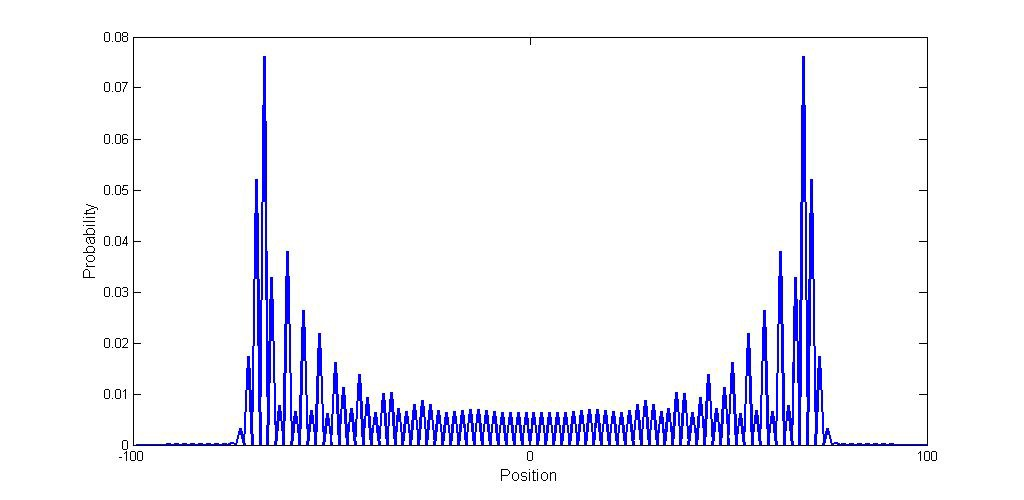

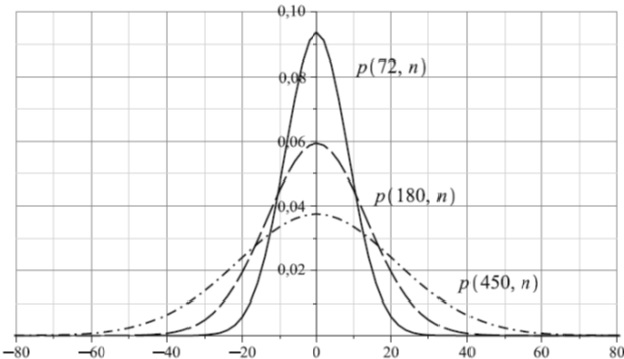

## Note: ##
As the code also runs on IBM hardware, the code must be uploaded to "try.jupyter.org" or "colab.research.google.com" online environments.
Therefore, the "pip install qiskit" and "pip install plyatexenc" commands are provided for this purpose.


In [ ]:
!python --version
!pip install qiskit

In [2]:
!pip install pylatexenc

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import plot_state_city
%matplotlib inline
import matplotlib as mpl
from random import randrange
import numpy as np
import networkx as nx
import random
import math 
from qiskit.tools.monitor import job_monitor

## Classical implementation: 
In this part of the program, codes are produced to simulate classic walk. 400 positions are considered, and the starting position is set to 200. After 200 steps, the following diagram is obtained, similar to the Gaussian distribution in most cases. the output is well comparable to the quantum walk output.

(150.0, 250.0)

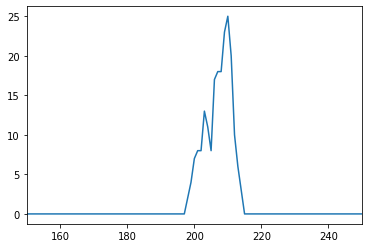

In [4]:
from random import randrange
pose=[]
for i in range(400): 
     pose.append([])
#print(pose)
#pose[-1]=1
#print(pose[-1])
pose[0]=200
for k in range(200):
    rand = randrange(0,2)
    if rand==0:
        #print(rand)
        pose[k+1]=pose[k]+1
    if rand==1:
        pose[k+1]=pose[k]-1
#print(pose)
yc=[]
for e in range(400): 
     yc.append([])
for q in range(400):
    yc[q]=0
    for h in range(400):
        if pose[h]==q:
            yc[q]=yc[q]+1
#print((yc))
#print(len(yc))
xc = np.arange(0, 400, 1)
plt.plot(yc)
plt.xlim(150, 250)

## Class quantom_walk:
This section defines the various functions used as a library and a class to be summarized and easy to call. The values of n are equal to the number of qubits related to position number. Step parameter is number of walking on the existing positions.Theta,phi are the angles used when applying U-gate on coin qubit.
If qtpye is equal to 1, it means that the initial state of the coin qubit does not change.
If it set two, it will be initialized with one Not-gate, and if it set three, U-gate will be applied to it.


In [5]:
class quantom_walk:   
    def __init__(self):
        self.__n=2
        self.__steps=1
        self.__theta=0
        self.__phi=0
        self.__qtype=1
        self.__shot=5000
    
    def main_qw(self,n,steps,qtype,theta,phi):
        self.__qpos = QuantumRegister(n,'qpos')
        self.__qcoin = QuantumRegister(1,'qcoin')
        self.__cpos = ClassicalRegister(n,'cr')
        self.__QC = QuantumCircuit(self.__qpos, self.__qcoin)
        if qtype==2: self.__QC.x(self.__qcoin[0])
        if qtype==3: self.__QC.u(theta, phi, 0, self.__qcoin[0])
        for i in range(steps):
            self.__QC.h(self.__qcoin[0])
            self.__QC.barrier()
            for i in range(n):
                self.__QC.mct([self.__qcoin[0]]+self.__qpos[i+1:], self.__qpos[i], None, mode='noancilla')
            self.__QC.barrier()
  
            self.__QC.x(self.__qcoin[0])
            for i in range(n):
                if i+1 < n: self.__QC.x(self.__qpos[i+1:])
                self.__QC.mct([self.__qcoin[0]]+self.__qpos[i+1:], self.__qpos[i], None, mode='noancilla')
                if i+1 < n: self.__QC.x(self.__qpos[i+1:])
            self.__QC.barrier()
        a=n/2
        p=math.floor(a)
        for k in range(n):
            if(k<p):
                self.__QC.swap(self.__qpos[n-1-k],self.__qpos[k])

    def displayh(self):
        display(self.__QC.draw(output="mpl"))
    def histagramh(self,shot):
        self.__QC.measure_all()
        job = execute(self.__QC,Aer.get_backend('aer_simulator'),shots=5000)
        counts = job.result().get_counts(self.__QC)   
        return counts
    def spacevectorh(self):
        backend = Aer.get_backend('statevector_simulator')
        job = execute(self.__QC, backend)
        result = job.result()
        outputstate = result.get_statevector(self.__QC, decimals=3)
        print(outputstate)
    def plotcityh(self):
        backend = Aer.get_backend('statevector_simulator')
        job = execute(self.__QC, backend)
        result = job.result()
        outputstate = result.get_statevector(self.__QC, decimals=3)
        from qiskit.visualization import plot_state_city
        plot_state_city(outputstate)
        return outputstate
    def unitaryh(self):
        backend = Aer.get_backend('unitary_simulator')
        job = execute(self.__QC, backend)
        result = job.result()
        yy=result.get_unitary(self.__QC, decimals=3)
        print(yy)
    def IBMQh(self):  
        from qiskit import IBMQ
        IBMQ.save_account('d1441affe8622903745ae099f50bce72c21036f85b14600d18195c977b9efcdee621dd4a981b92d8028c03c4dc1860c82d70f501d345023471402f4f8dad0181',overwrite=True)
        provider = IBMQ.load_account()
        device = provider.get_backend('ibmq_quito')     #we use ibmq_16_melbourne quantum device 
        job = execute(self.__QC, backend = device) #we pass our circuit and backend as usual 
        from qiskit.tools.monitor import job_monitor
        job_monitor(job)    #to see our status in queue
        result = job.result()
        counts= result.get_counts(self.__QC)
        return counts
    def instructionset(self):
        print(self.__QC.qasm())
        


In [6]:
qw = quantom_walk()
qw.main_qw(4,4,1,1.5,4)
#qw.instructionset()
#qw.displayh()
#plot_histogram(qw.histagramh(3000), figsize=(20, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None)
#qw.histagramh(3000)
#qw.spacevectorh()
#qw.unitaryh()
#qw.plotcityh()
#plot_state_city(qw.plotcityh(), figsize=(20, 10))
#plot_histogram(qw.IBMQh(), figsize=(5, 2), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None, filename=None)
#qw.IBMQh()

## Calling  functions :
In all calls, the circuit itself must first be called with the command "qw.main_qw".


## Display Circuit:
We can access the circuit display for different modes of circuit(desired  positions,steps and three different types with defined theta and phi if qtype=3 is selected)by calling this function.
If qtype isn't equal to 3 and therefore ugate isn't applied on coin qubit then theta and phi are not importentand have no effect.

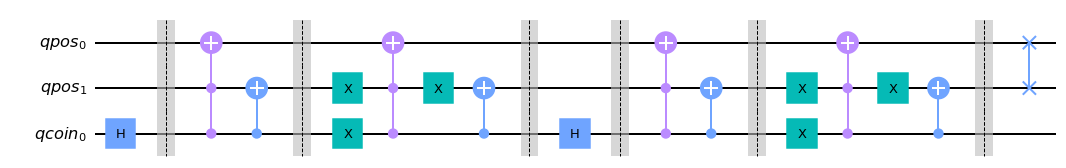

In [7]:
qw = quantom_walk()
qw.main_qw(2,2,1,1.5,4)
qw.displayh()

## Histogram diagram:
The histogram diagram, which represents the probability distribution on the positions, will be shown by calling this function.

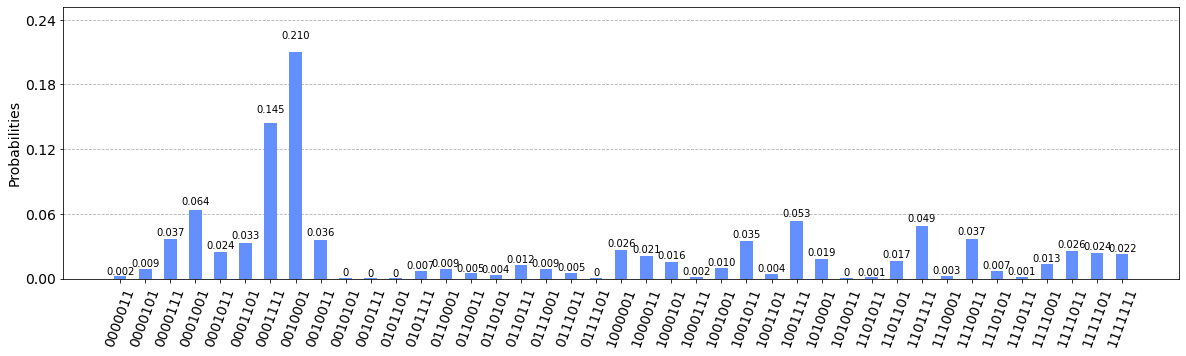

In [8]:
qw.main_qw(6,25,1,1.5,4)
plot_histogram(qw.histagramh(3000), figsize=(20, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None)


## Output State:
By calling this function, the final state of the q- bits will be shown step after repetition.

In [9]:
qw.main_qw(3,4,1,1.5,4)
qw.spacevectorh()

[-0.25+0.j  0.  +0.j -0.75+0.j  0.  +0.j  0.25+0.j  0.  +0.j -0.25+0.j
  0.  +0.j -0.25+0.j  0.  +0.j  0.25+0.j  0.  +0.j  0.25-0.j  0.  +0.j
 -0.25+0.j  0.  +0.j]


## Plot State City
Using this function, we will have a display as a "city," which is much more telling in showing the probability distribution.

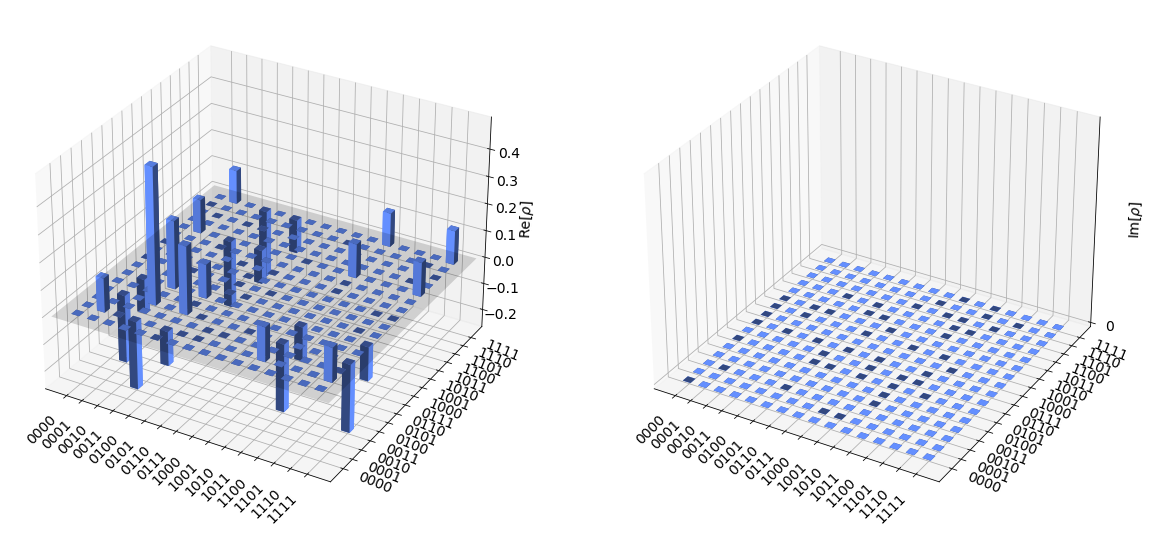

In [10]:
qw.main_qw(3,15,1,1.5,4)
plot_state_city(qw.plotcityh(), figsize=(20, 10))

## Unitary Matrix:
We can get the unitary circuit matrix for different steps and the number of position qubits with this command.
In this project, I used this command to extract the unitary matrix with one step, then using this matrix in programethat obtain the optimized U-gate in MATLAB software, which causes the coin qubit to be initialized in the best optimal state to have better probability distribution output on existing positions.
This part is different from the work of others and new.


In [11]:
qw.main_qw(2,3,1,1.5,4)
qw.unitaryh()

[[ 0.   +0.j  0.   +0.j -0.   +0.j -0.707+0.j  0.   +0.j  0.   +0.j
  -0.707+0.j  0.   -0.j]
 [-0.707+0.j -0.   +0.j  0.   +0.j  0.   +0.j  0.   -0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j -0.707+0.j -0.   +0.j  0.   +0.j  0.   +0.j
   0.   -0.j -0.707+0.j]
 [-0.   +0.j -0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j  0.   -0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   -0.j  0.707-0.j  0.   +0.j  0.   +0.j
  -0.707+0.j  0.   -0.j]
 [ 0.707-0.j  0.   -0.j  0.   +0.j  0.   +0.j  0.   -0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707-0.j  0.   -0.j  0.   +0.j  0.   +0.j
   0.   -0.j -0.707+0.j]
 [ 0.   -0.j  0.707-0.j  0.   +0.j  0.   +0.j -0.707+0.j  0.   -0.j
   0.   +0.j  0.   +0.j]]


## Instruction Set:
Using this command, we can obtain instruction sets and use them in the IBM Composer to have a sound output of the outpout state and Bloch sphere in a very obvious and simple form.

In [12]:
qw.main_qw(3,2,1,1.5,4)
qw.instructionset()

OPENQASM 2.0;
include "qelib1.inc";
gate mcx q0,q1,q2,q3 { h q3; p(pi/8) q0; p(pi/8) q1; p(pi/8) q2; p(pi/8) q3; cx q0,q1; p(-pi/8) q1; cx q0,q1; cx q1,q2; p(-pi/8) q2; cx q0,q2; p(pi/8) q2; cx q1,q2; p(-pi/8) q2; cx q0,q2; cx q2,q3; p(-pi/8) q3; cx q1,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q0,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q1,q3; p(pi/8) q3; cx q2,q3; p(-pi/8) q3; cx q0,q3; h q3; }
qreg qpos[3];
qreg qcoin[1];
h qcoin[0];
barrier qpos[0],qpos[1],qpos[2],qcoin[0];
mcx qcoin[0],qpos[1],qpos[2],qpos[0];
ccx qcoin[0],qpos[2],qpos[1];
cx qcoin[0],qpos[2];
barrier qpos[0],qpos[1],qpos[2],qcoin[0];
x qcoin[0];
x qpos[1];
x qpos[2];
mcx qcoin[0],qpos[1],qpos[2],qpos[0];
x qpos[1];
x qpos[2];
x qpos[2];
ccx qcoin[0],qpos[2],qpos[1];
x qpos[2];
cx qcoin[0],qpos[2];
barrier qpos[0],qpos[1],qpos[2],qcoin[0];
h qcoin[0];
barrier qpos[0],qpos[1],qpos[2],qcoin[0];
mcx qcoin[0],qpos[1],qpos[2],qpos[0];
ccx qcoin[0],qpos[2],qpos[1];
cx qcoin[0],qpos[2];
barrier qpos[0],qpos[1],qpos[2],qc

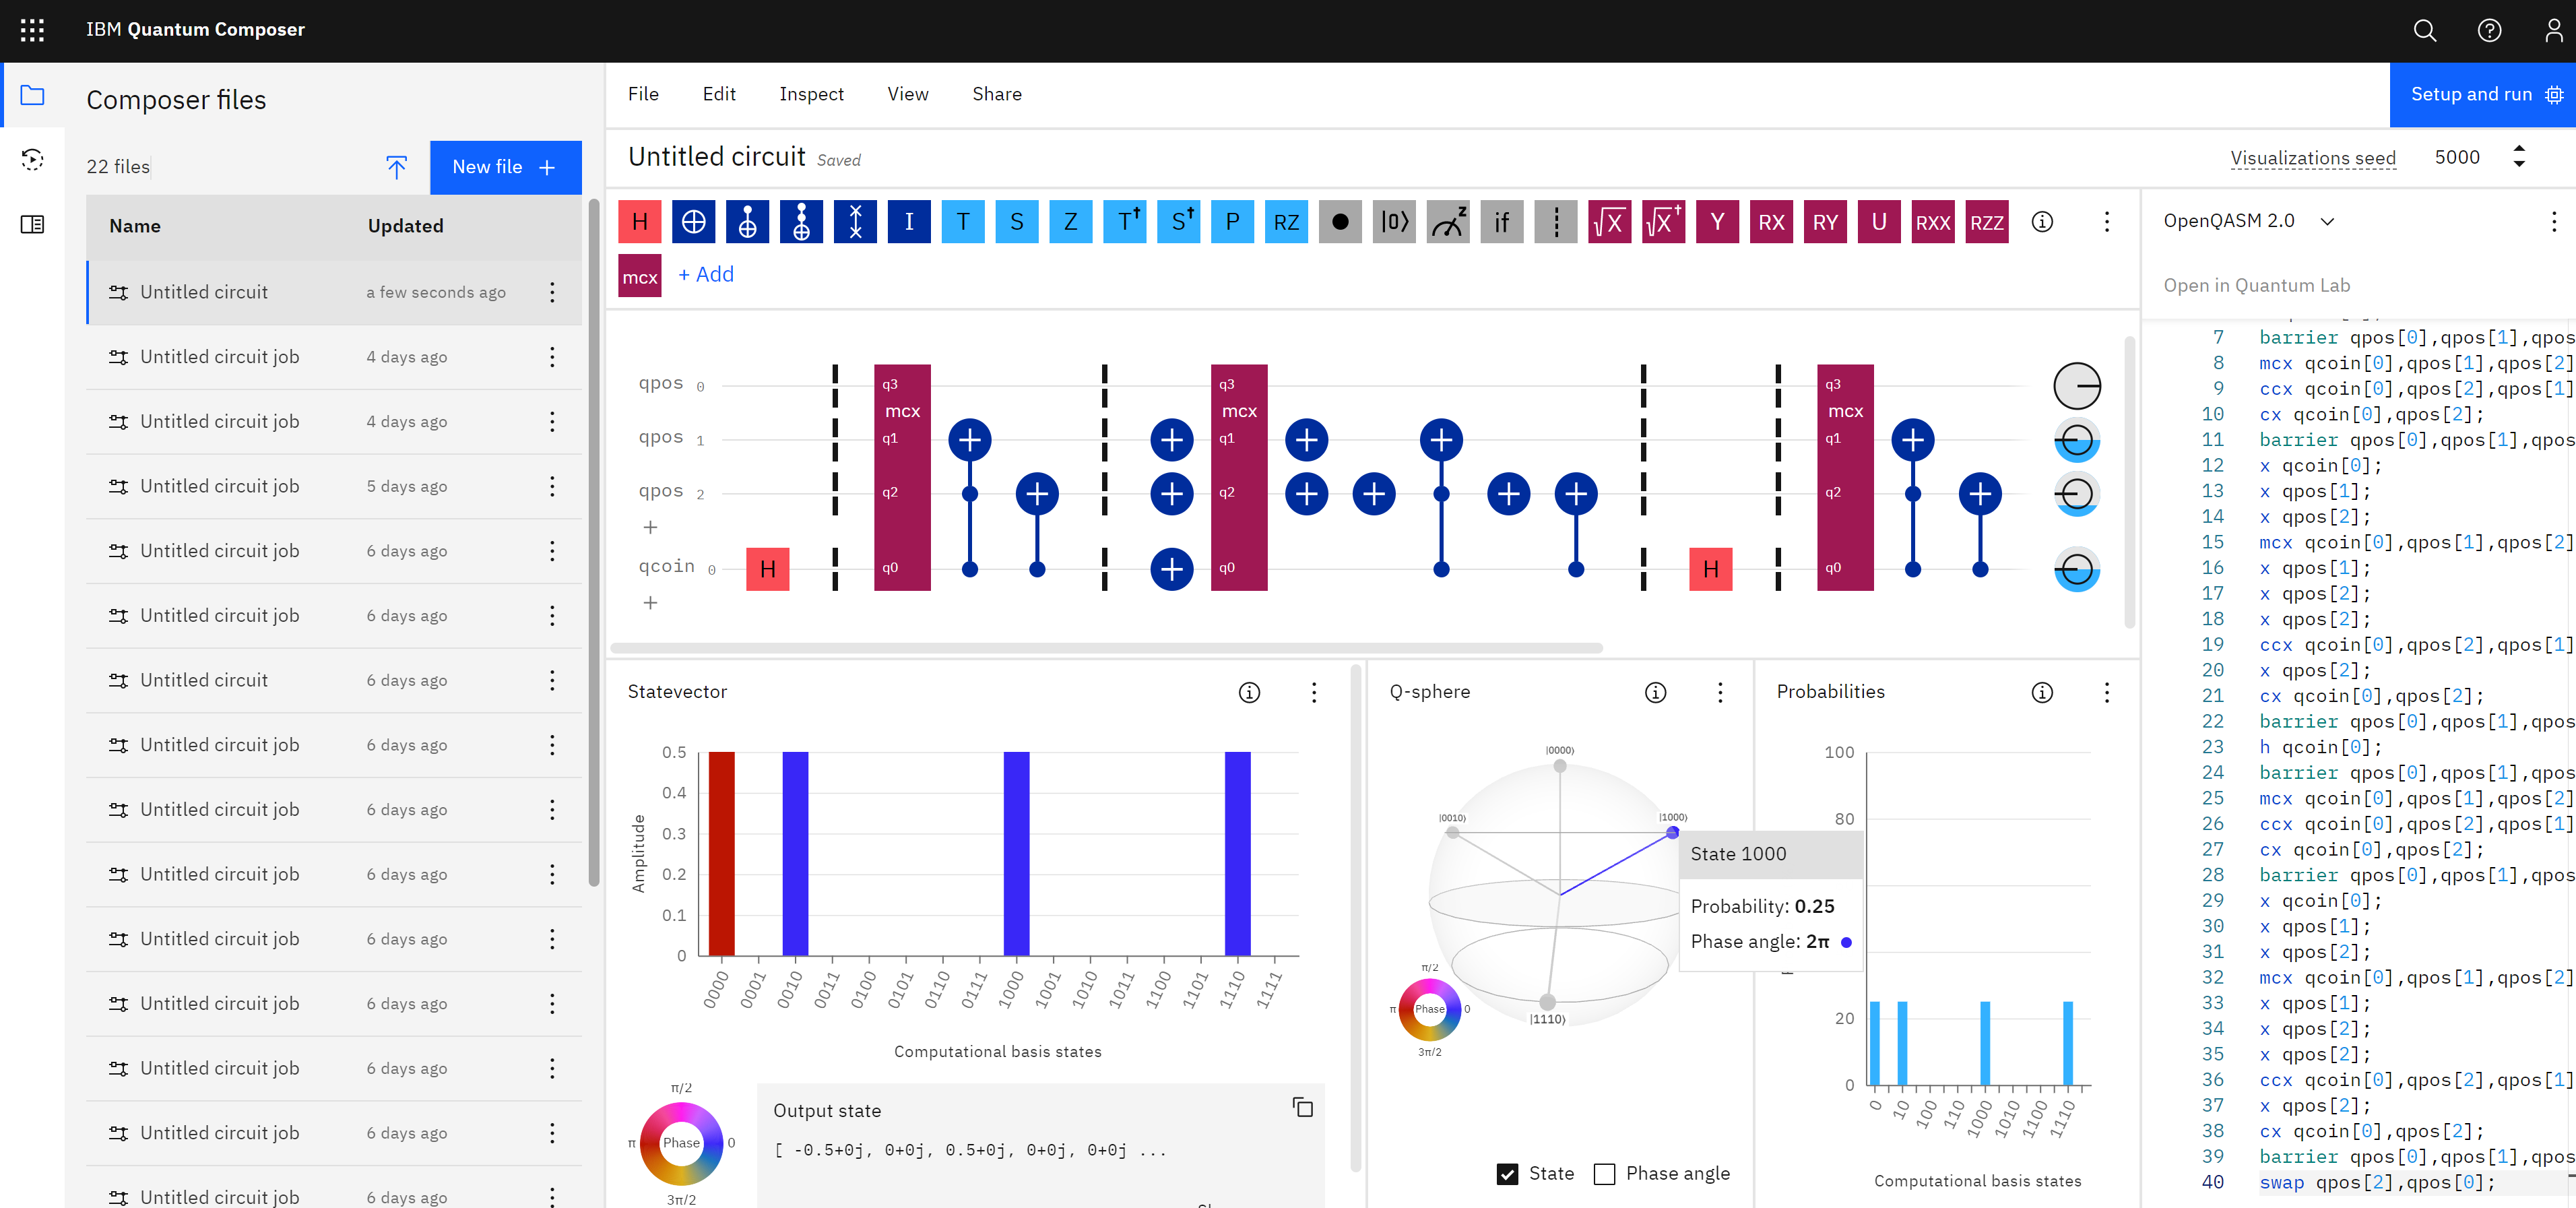

## IBM Quantom Computer:
Using this command, we run the circuit on IBM hardware, and we have to wait in line for a long time until getting the permission to run our project on a real quantum computer.
Note this part should be run by an online jupyter notebook.For example you can use https://colab.research.google.com/ to upload the python file and run this part.
We have used the Manila core. And the token used by IBM is dedicated to my account.
The point is that in this case, the number of qubits should not be more than 5, so "n" can finally be selected as 4.More than 18 times the circuit ran on ibmq at last we find out that ibm real quantom computer is noisy.then we set n and step at low value.However it was a very nice experience.


In [ ]:
qw.main_qw(2,1,1,1.5,4)
plot_histogram(qw.IBMQh(), figsize=(5, 2), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None, filename=None)

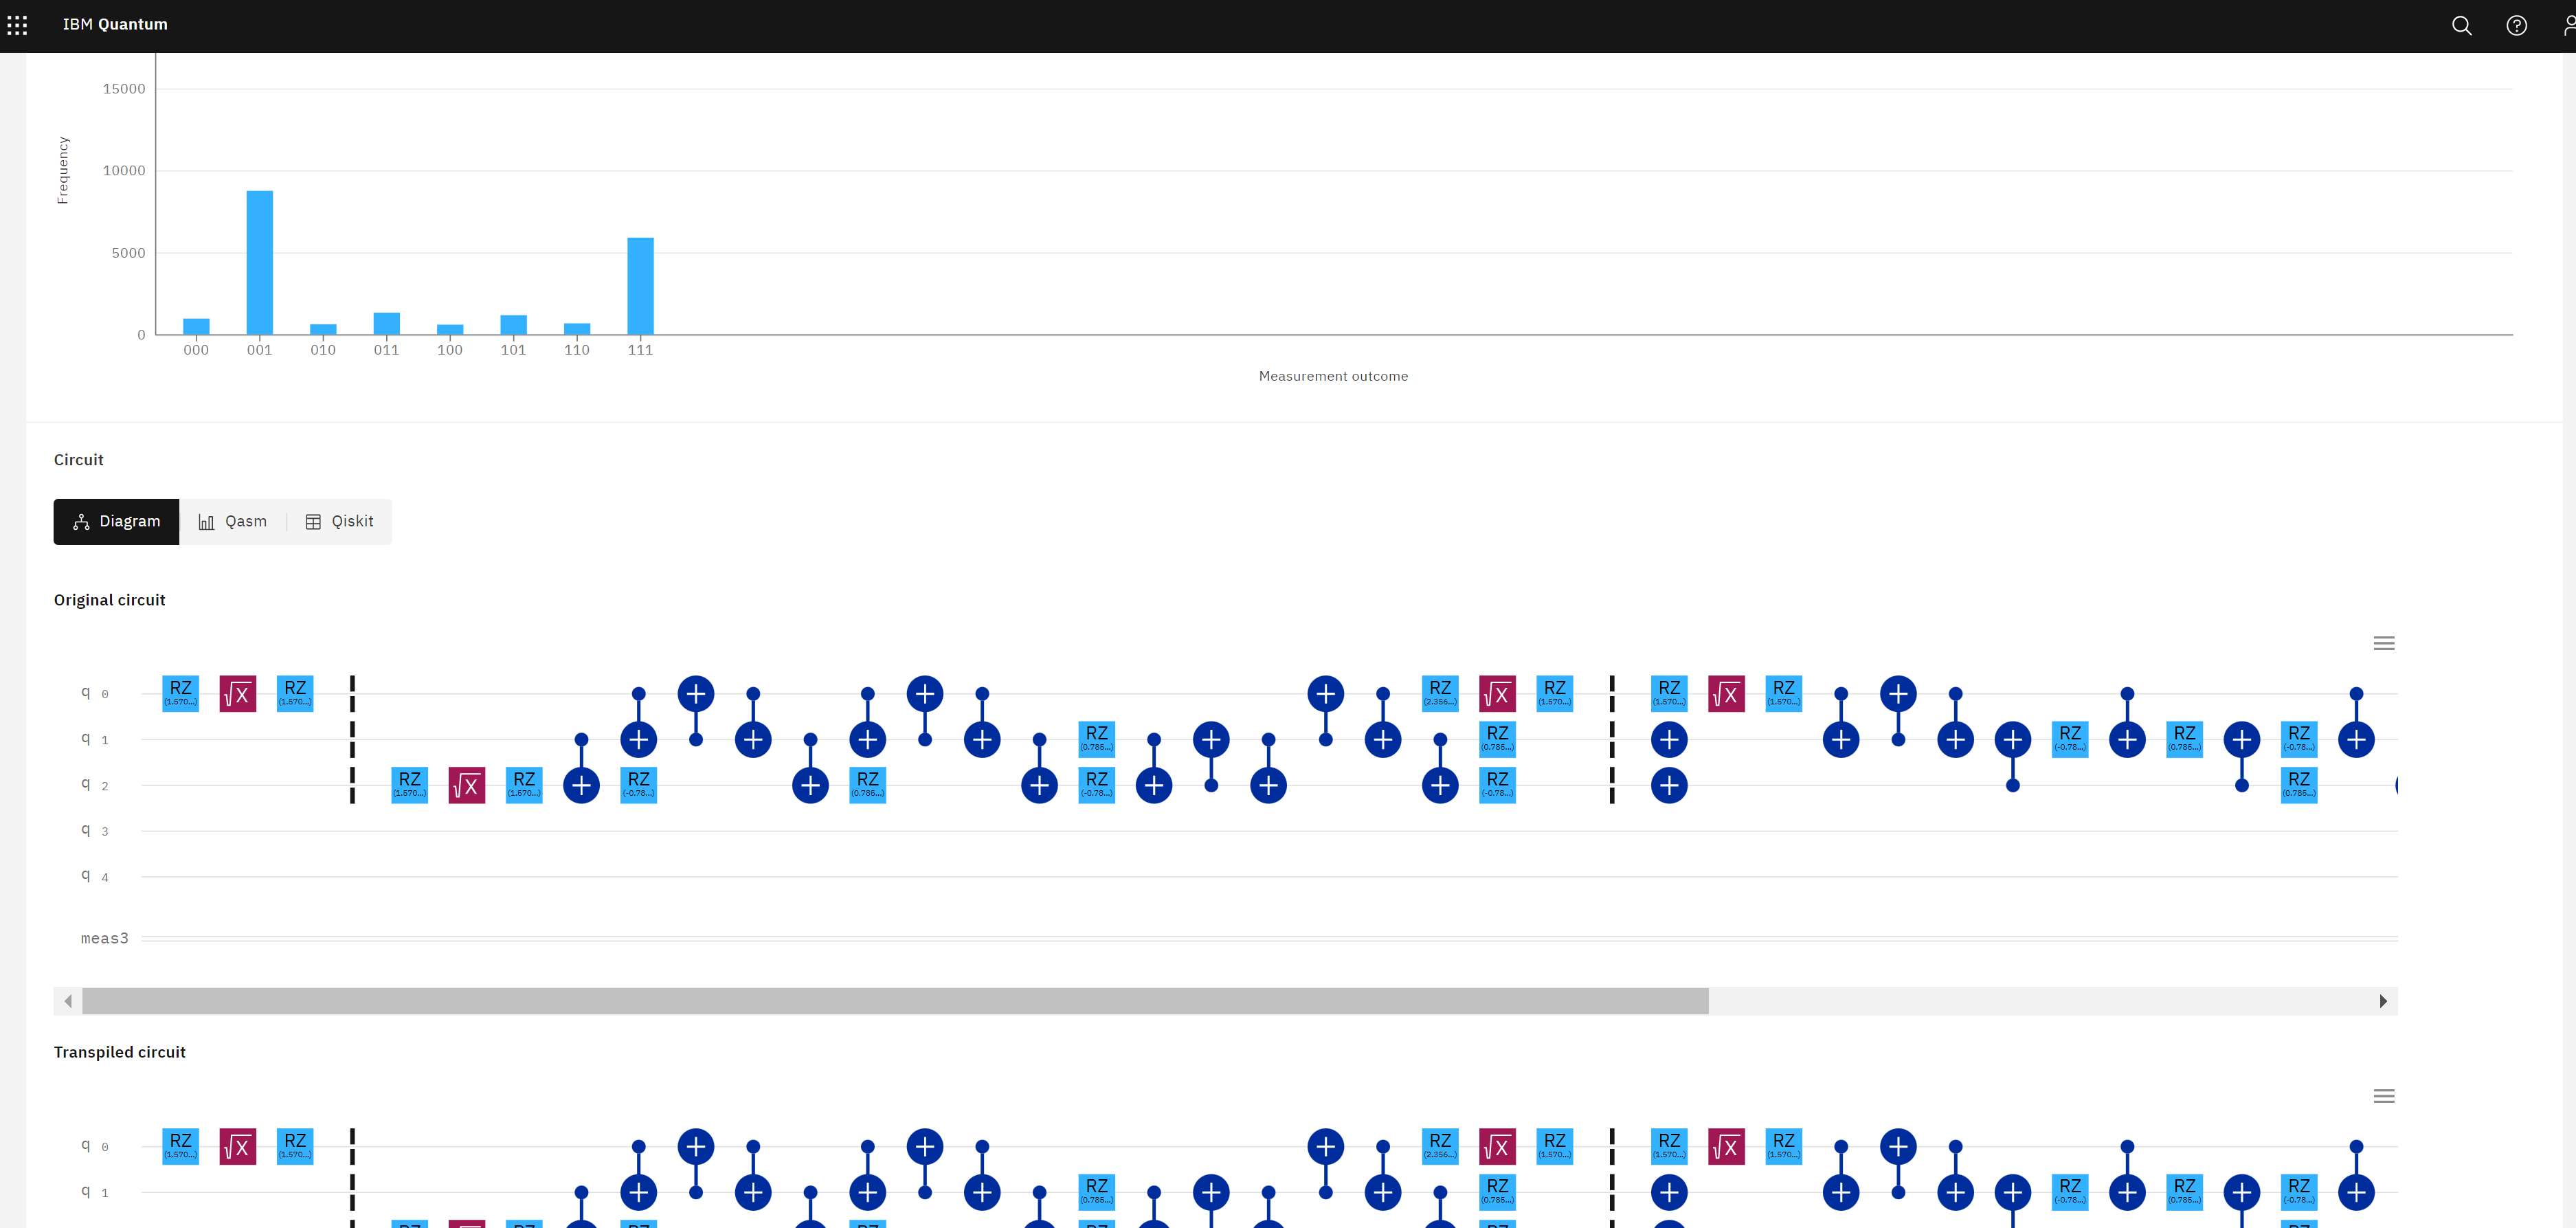

## U-gate Operator optimization Using Matlab Software
In this part of the project, U-gate applies to Qubit Coin to change the  initial state because we know that the initial state of coin qubit directly affects the probability distribution on different positions.
The goal is to optimize the $\theta$ and $\phi$ values in the U-gate matrix to minimize the standard deviation and distribute the probabilities more equitably over different positions.
In this direction, the $\theta$ and $\phi$ values will be obtained to achieve the fairest possible distribution as far as possible.
Since the initial phase is of coin qubit is 1 and 0, the $\lambda$ angle will be eliminated and is ineffective when applying U-gate.

For this purpose, we obtain the operator matrix for one step in Qiskit.
And then, to have the output after the $\ steps=step$, final operator is a^(step).
The program is optimized for three-qubit positions.

After applying it to the input that has been initialized with U-gate, the output state matrix is obtained.
And based on that, we get the standard deviation of output state.
Obviously the standard deviation will be a function of $\theta$ and $\phi$.
For different $\theta$ and $\phi$, the standard deviation is measured, and then the $\theta$ and $\phi$ are obtained, which leads to the minimum standard deviation.

The 3D plot is performed for better display .MATLAB code is finalized and very programmed in a brief form.
final codes are shown below.
The interesting and important point is that the $\theta $ and $\phi $ values are the same for all the steps, and the value $\theta=1.56rad $ and $\phi=1.56 or 4.7rad $  is obtained, which was already expected.


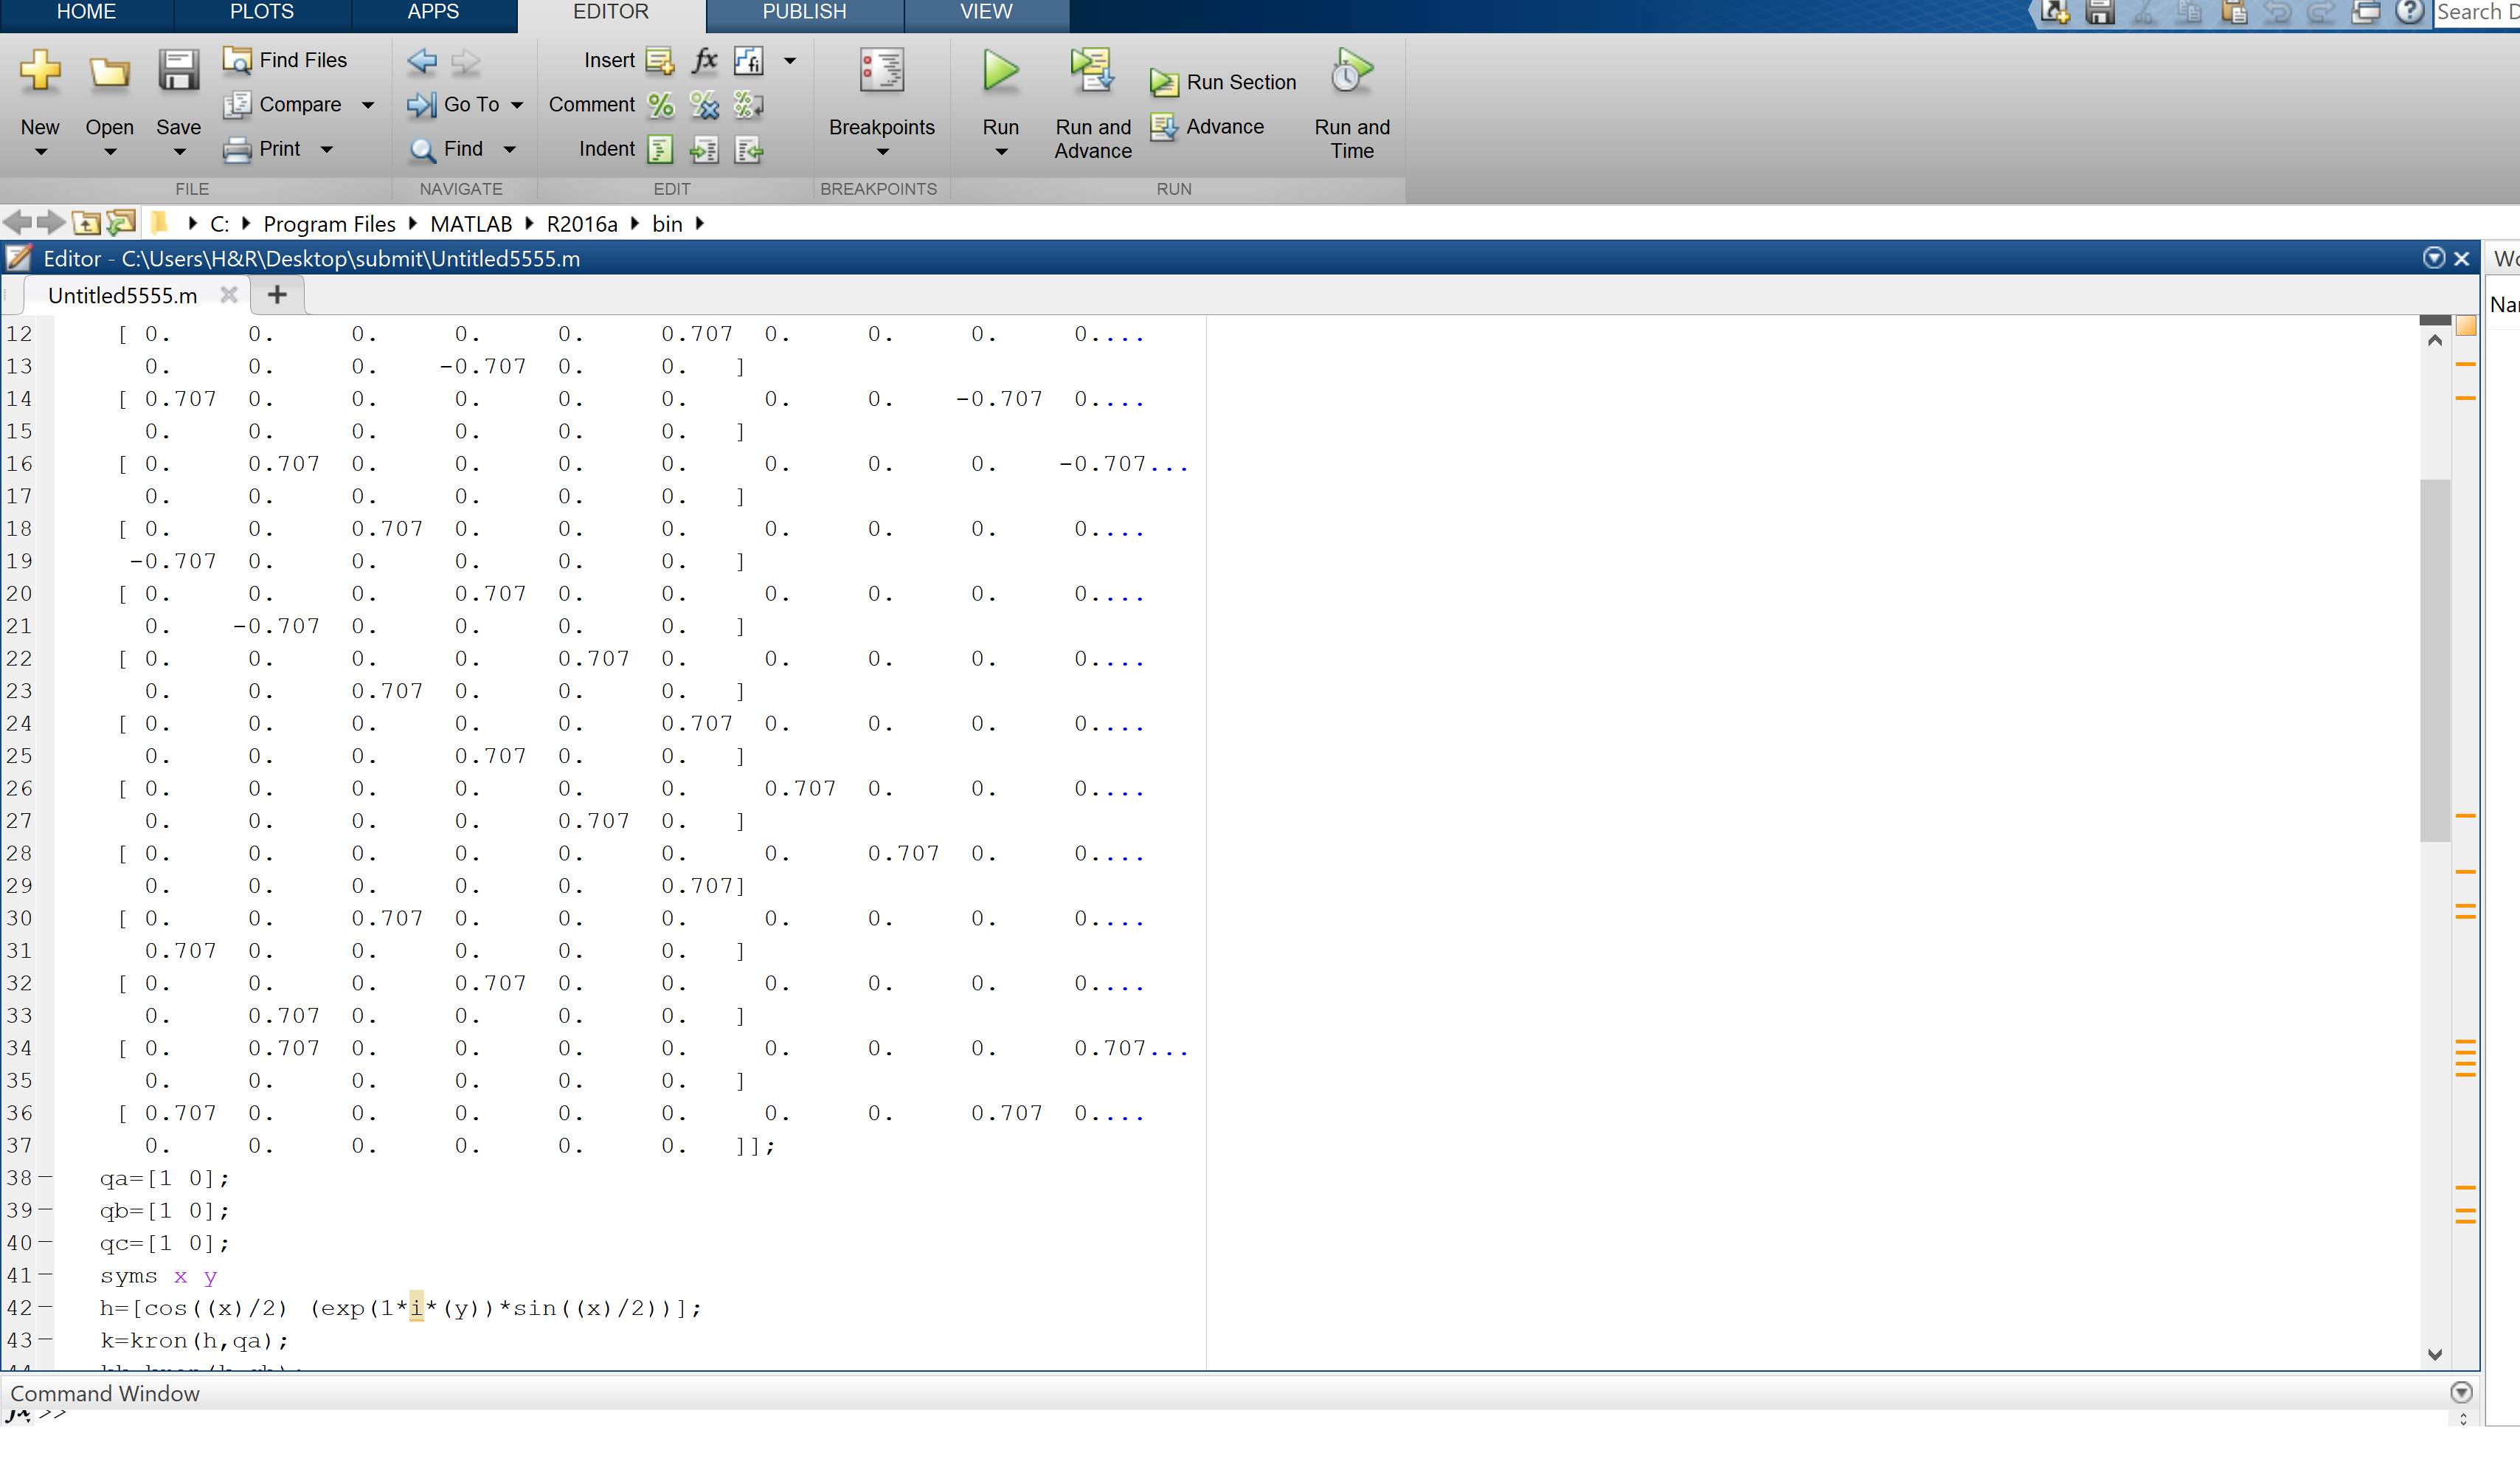

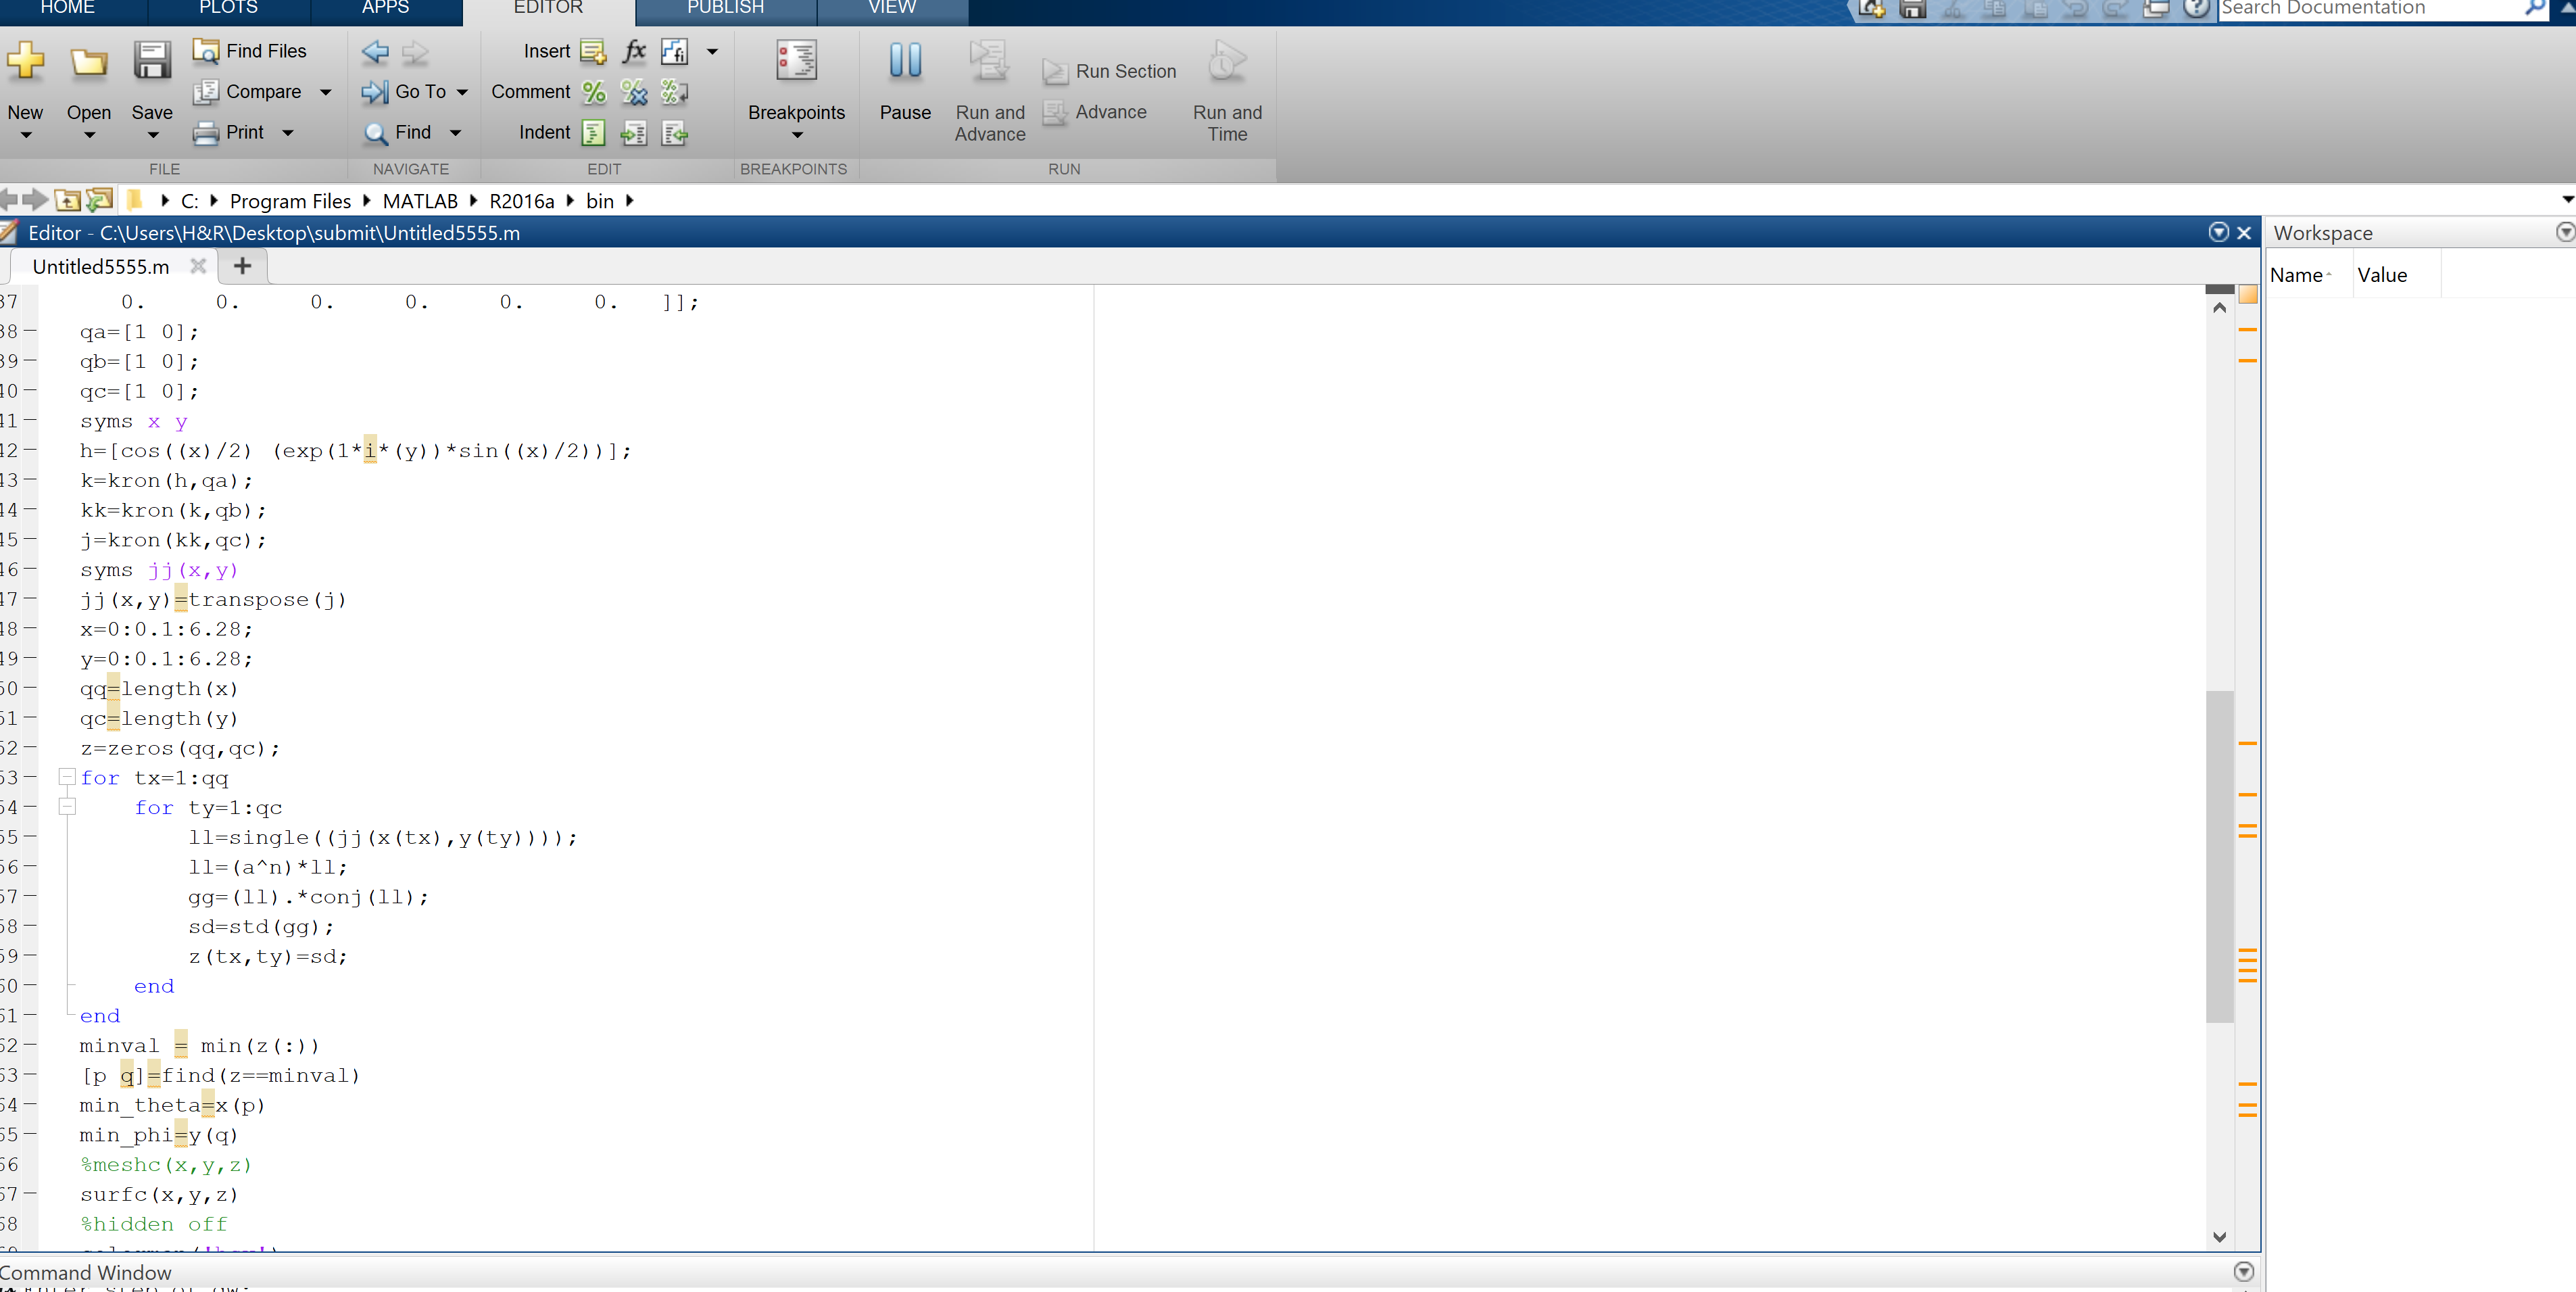

# Note:x and y are  means  $\theta$ and $\phi$ accordingly and z is standard deviation of output probability

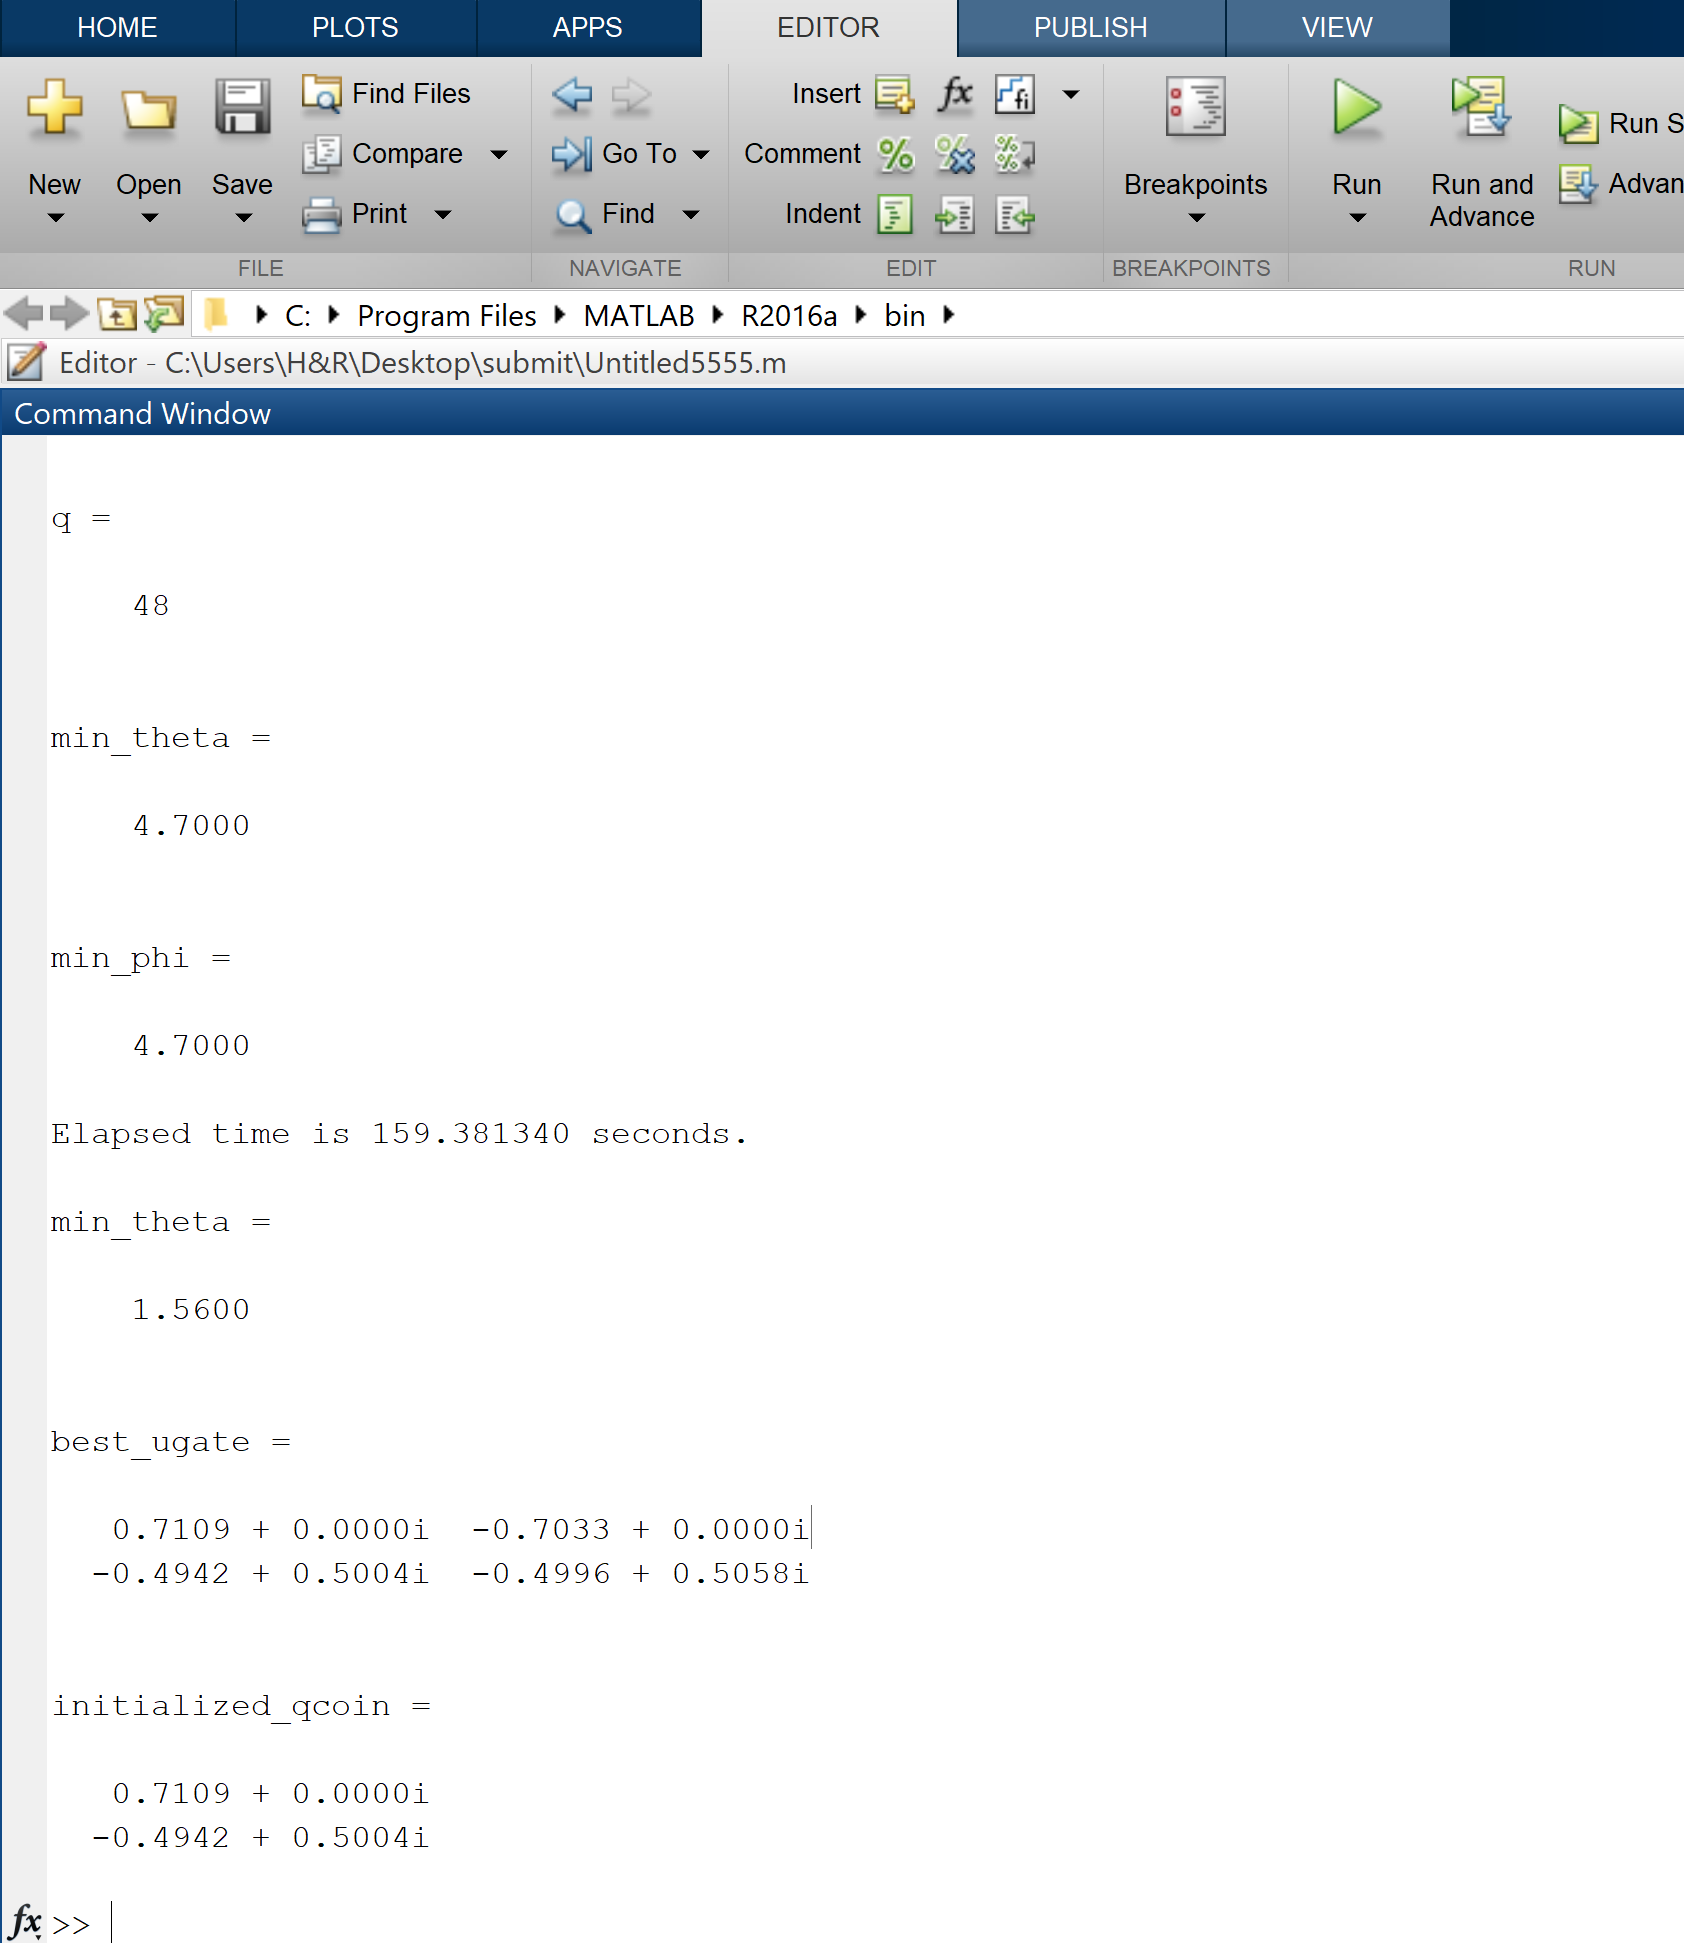


Elapsed time is 159.381340 seconds.

min_theta =

    1.5600


best_ugate =

   0.7109 + 0.0000i  -0.7033 + 0.0000i
  -0.4942 + 0.5004i  -0.4996 + 0.5058i


initialized_qcoin =

   0.7109 + 0.0000i
  -0.4942 + 0.5004i

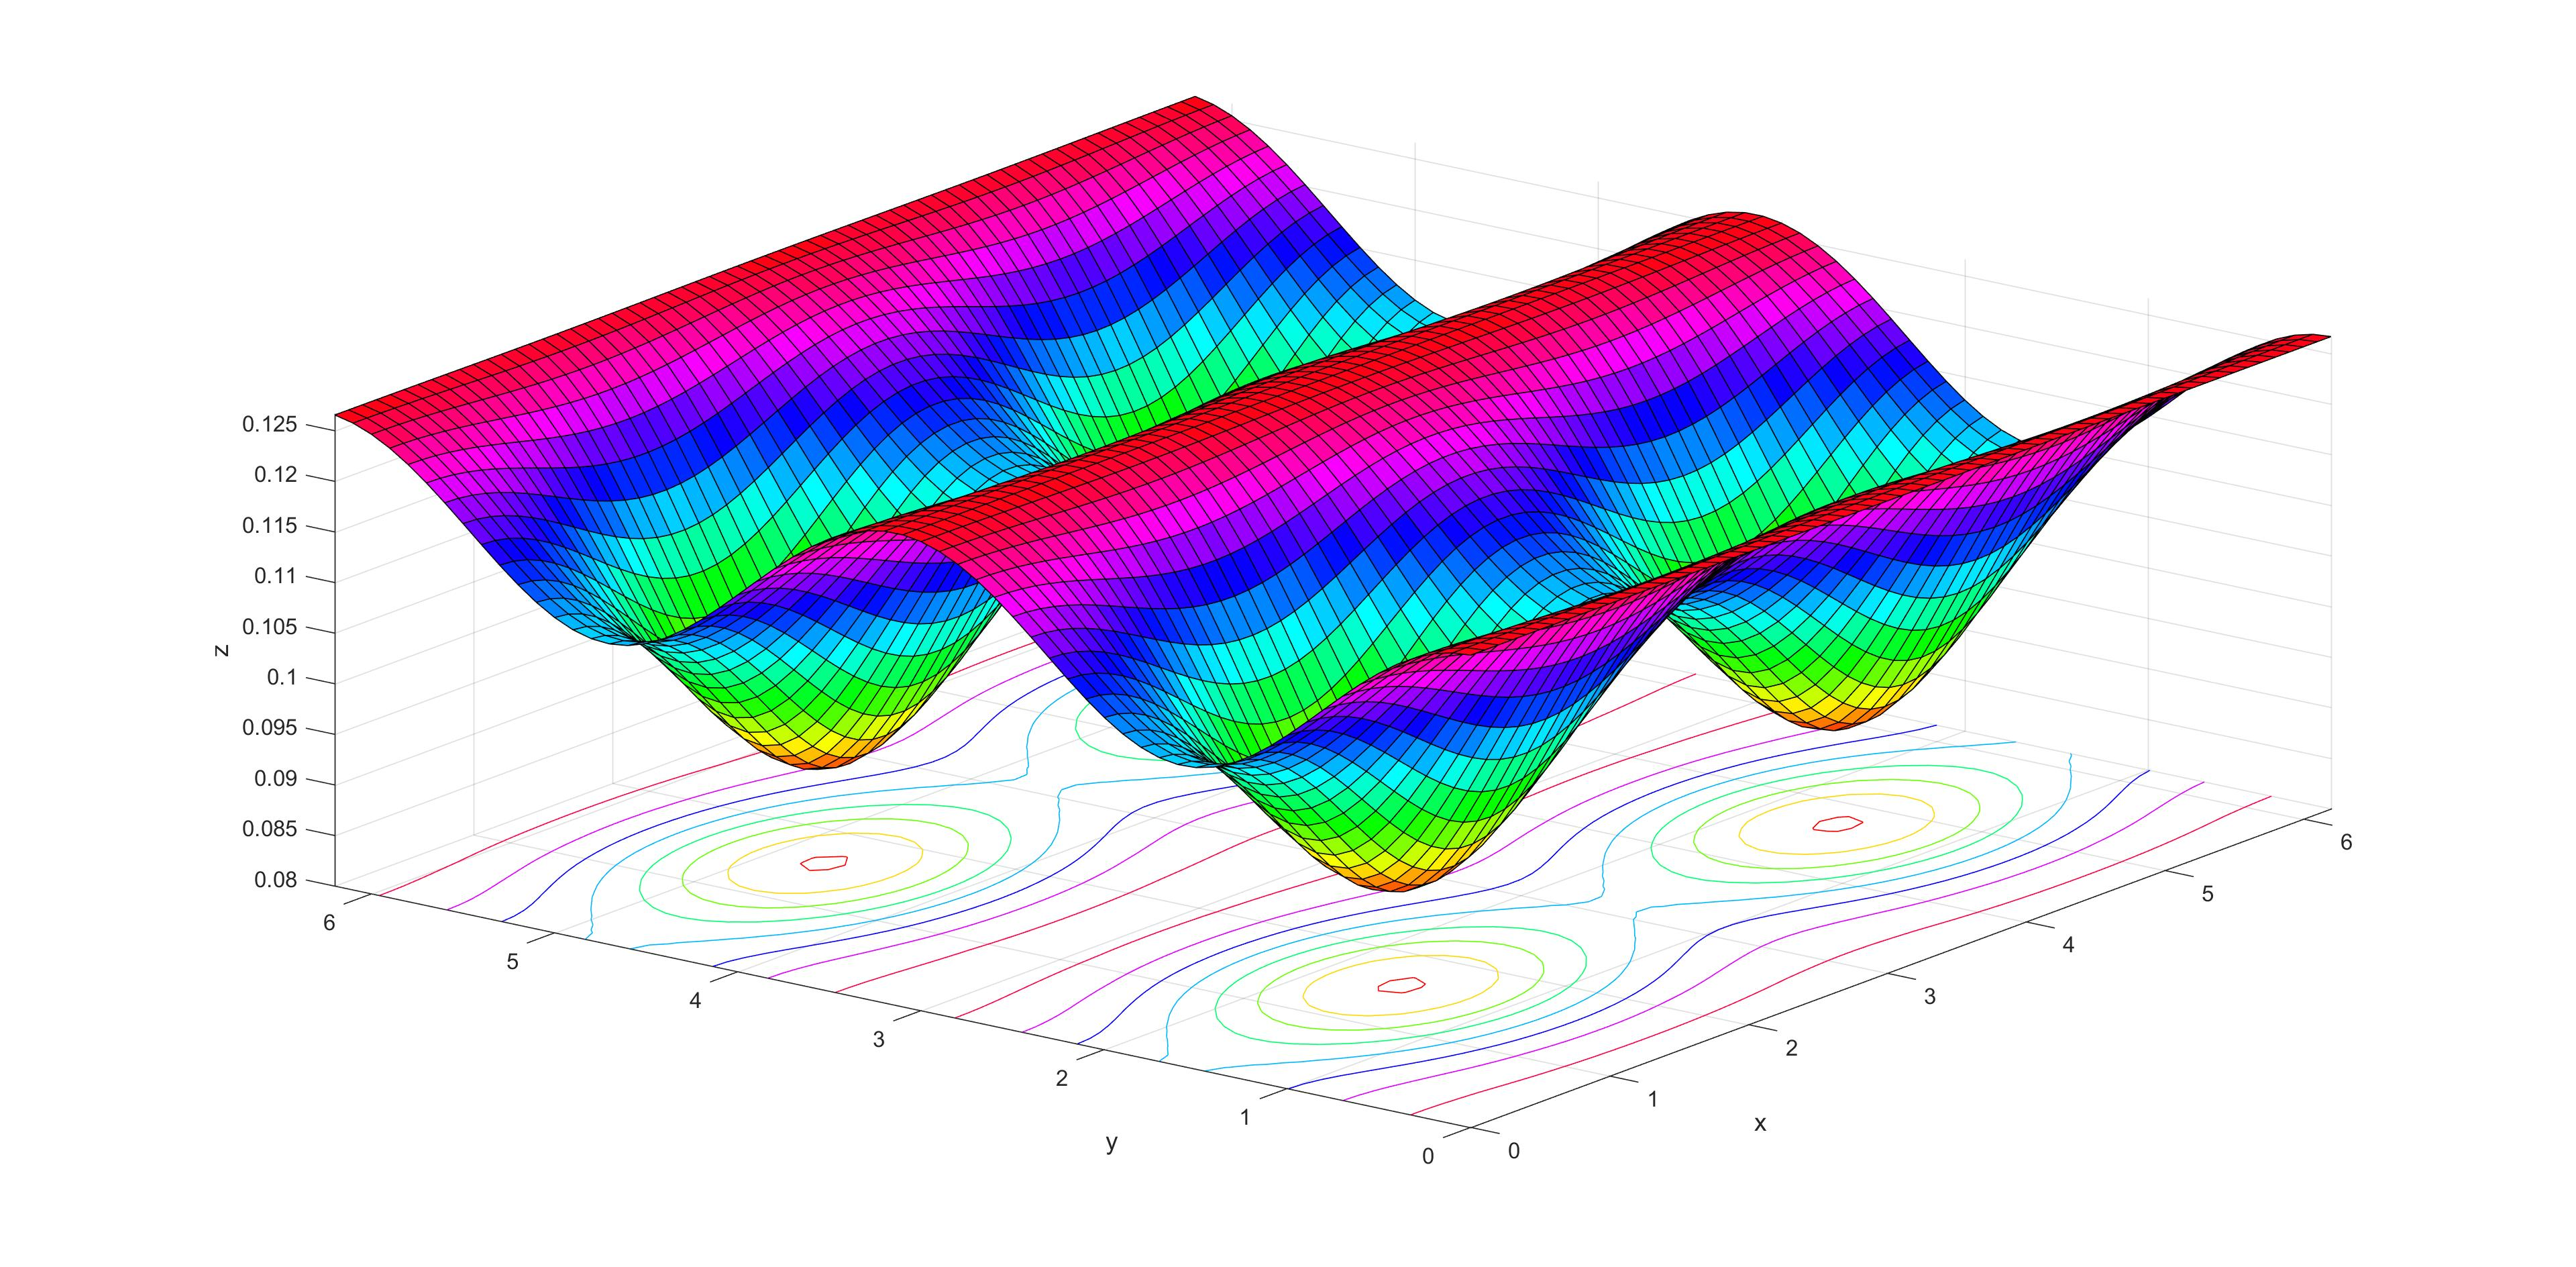

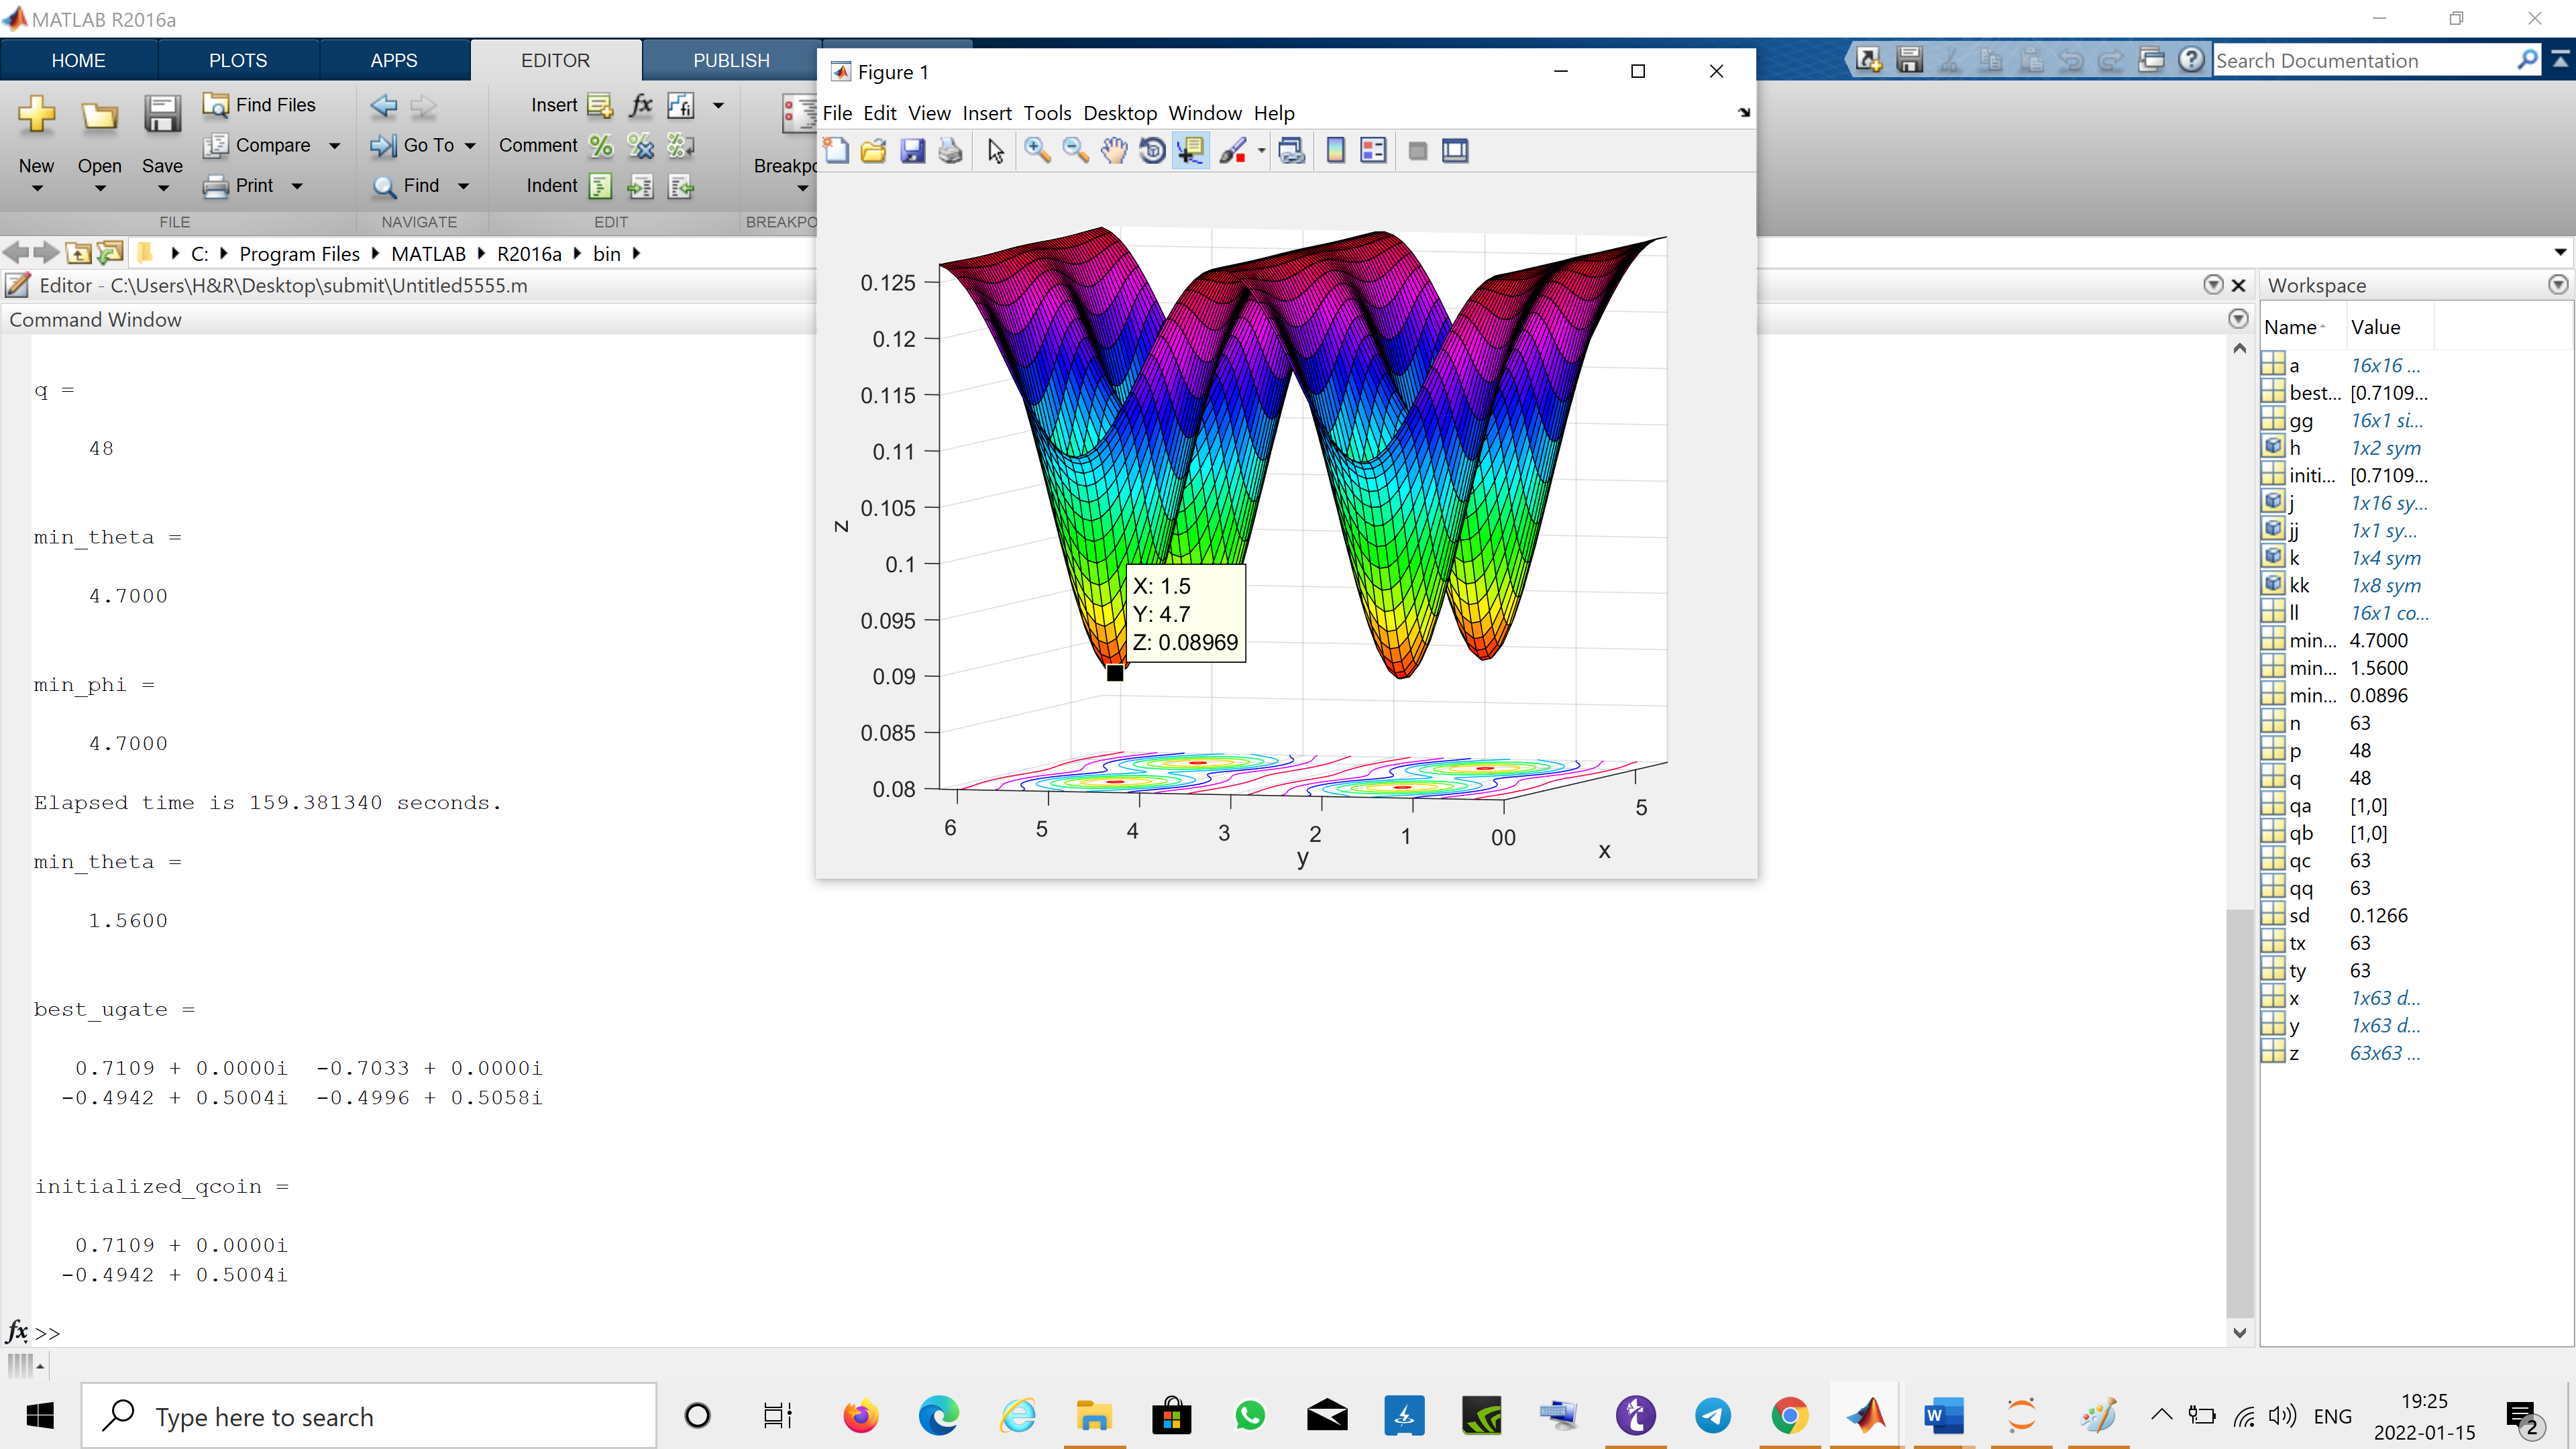

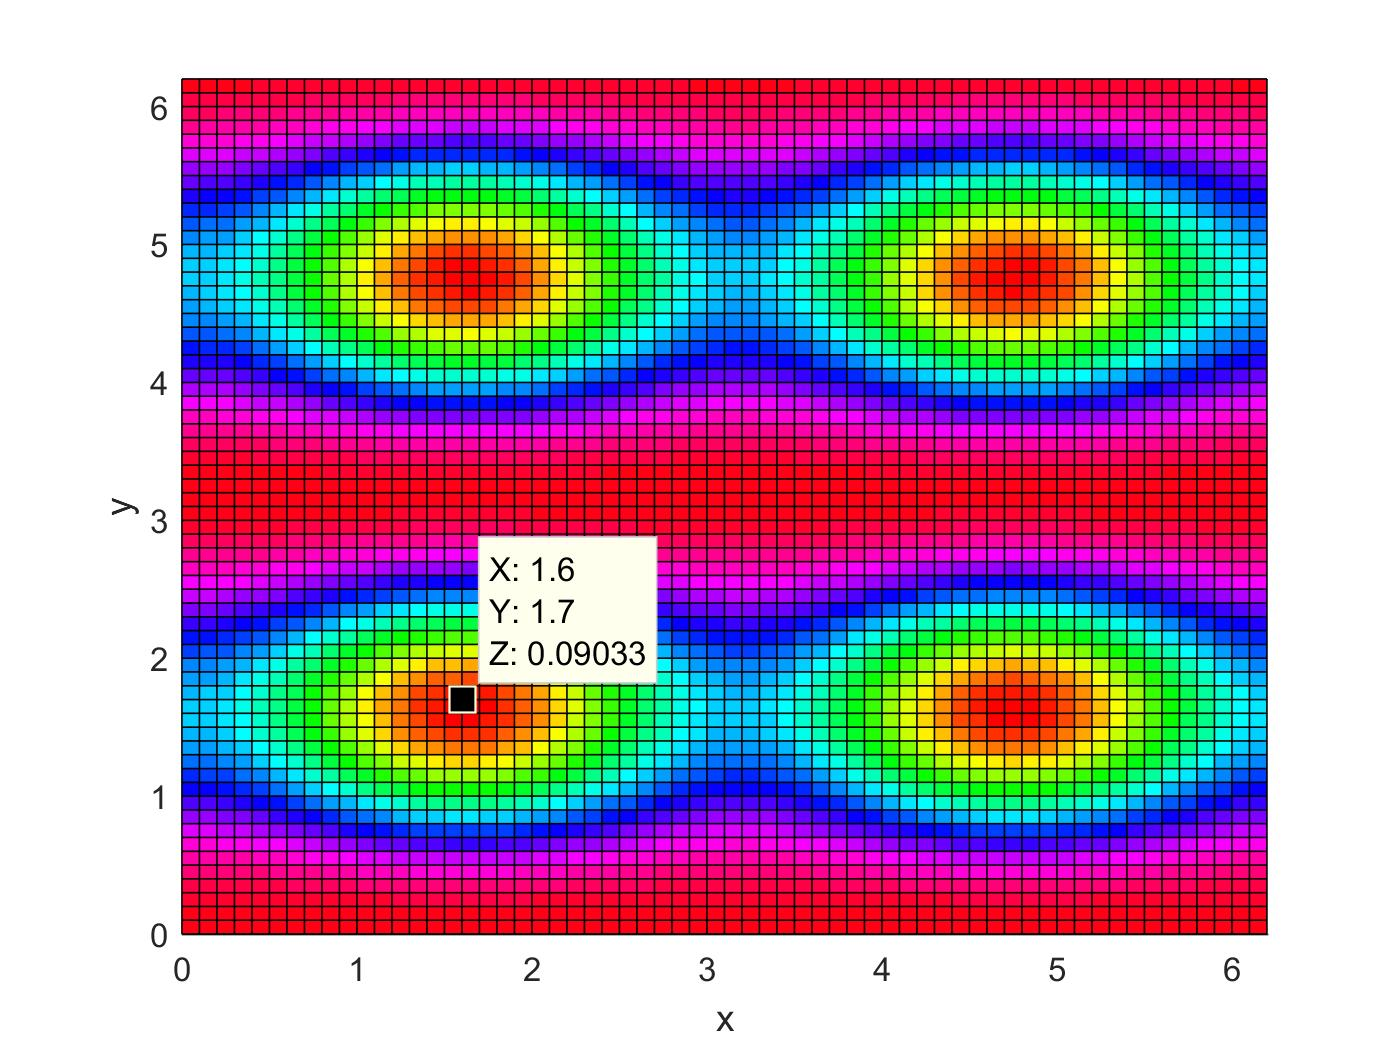

## Comparison The Result (Optimized and non Optimal)
The outputs are compared when a  simple Hadamard is appllied on coin qubit and  when optimized optimized ugate is applied on it, which has resulted in a better possible distribution.We can see the probability distribution improved.

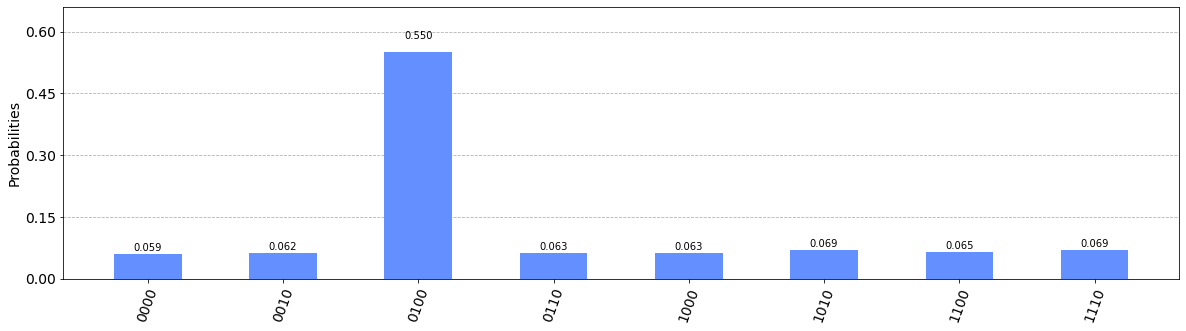

In [16]:
#hadamrad...qtype=1 
qw = quantom_walk()
qw.main_qw(3,32,1,0,0)
plot_histogram(qw.histagramh(3000), figsize=(20, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None)

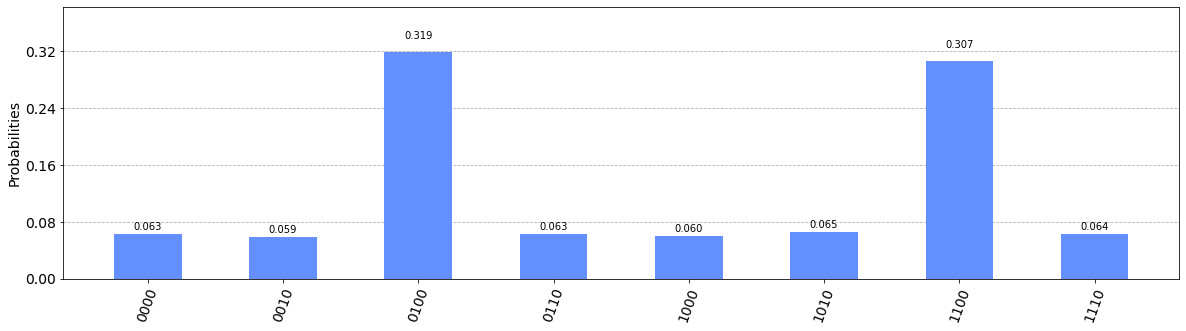

In [17]:
#optimized ugate applied...qtype=3
qw = quantom_walk()
qw.main_qw(3,32,3,1.57,1.57)
plot_histogram(qw.histagramh(3000), figsize=(20, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None)

## Challanges:

Running on a real quantum computer encountered a problem that after 18 different runs and various checks, we realized that the output of the real computer was different from simulations and they are noisy, so we considered the number of qubits and steps low to get correct answer from IBMQ.

**

The output of the unitary matrix in the high dimension range (When n is bigger than 4) is not fully displayed.
Therefore, to transfer and copy in MATLAB, we finally used n = 3 positions to transfer complete data.

**

We encountered many problems in getting output from MATLAB, many of them  solved  and led to output.
One of the main problems was the high running time and acctually no response to the program, which was partially solved by optimizing the program. And now it takes about two minutes long to run the program.

**

The output of qubits in the histogram was shown in reverse and LSB sequence,  we make it by appling appropriate swap gate commands to the get correct answer  (coded).

**

Failure to run the program on the offline version of the notebook and troubleshoot through web-based versions(try.jupyter.org)


## Suggestion:

Our suggestion for continuing is to use Hadamard before U-gate for initializing qoin qubit so that the  variable  equations contains $\Lambda$, which will probably lead to a better probability distribution.